## 13 - Python Finance

**Capitulo 13**: O site INVESTING.COM possui uma imensa base de dados de ativos financeiros de vários países.

Objetivo: Montar estrutura a termo da curva de juros com dados do investing.com utilizando python. 

## 1. Importando bibliotecas

In [ ]:
!pip install investpy

In [1]:
import investpy as inv

In [2]:
import plotly.graph_objects as go

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

##2. Curva de Juros

Obter dados das taxas de juros e montar uma curva de juros

In [4]:
bondsBR = inv.get_bonds_list('brazil')

In [5]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [6]:
bonds_overview  = inv.get_bonds_overview('brazil')

In [7]:
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,3.369,3.448,3.331,3.331,-0.079,-2.29%
1,brazil,Brazil 6M,4.159,4.145,4.120,4.120,+0.014,+0.34%
2,brazil,Brazil 9M,4.699,4.775,4.675,4.675,-0.076,-1.59%
3,brazil,Brazil 1Y,5.233,5.235,5.235,5.235,-0.002,-0.04%
4,brazil,Brazil 2Y,7.117,7.400,7.475,7.475,-0.283,-3.83%
5,brazil,Brazil 3Y,7.433,7.855,7.970,7.970,-0.422,-5.38%
6,brazil,Brazil 5Y,8.285,8.390,8.310,8.310,-0.105,-1.26%
7,brazil,Brazil 8Y,9.227,8.990,9.265,9.265,+0.237,+2.64%
8,brazil,Brazil 10Y,9.368,9.150,9.405,9.405,+0.218,+2.38%


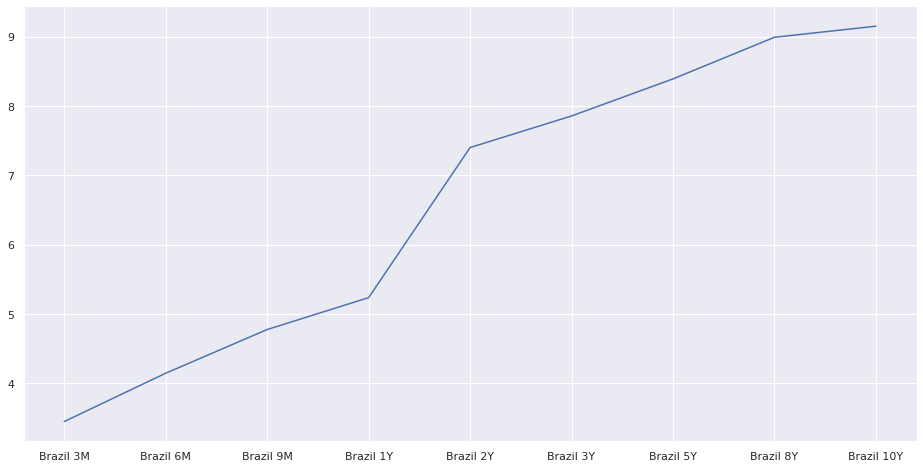

In [8]:
plt.plot(bondsBR, bonds_overview['last_close']);

In [9]:
data_inicio = '01/01/2010'
data_fim = '12/04/2021'

um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano 

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2021-04-06,5.170,5.175,5.170,5.175
2021-04-07,5.235,5.235,5.230,5.230
2021-04-08,5.235,5.310,5.235,5.310


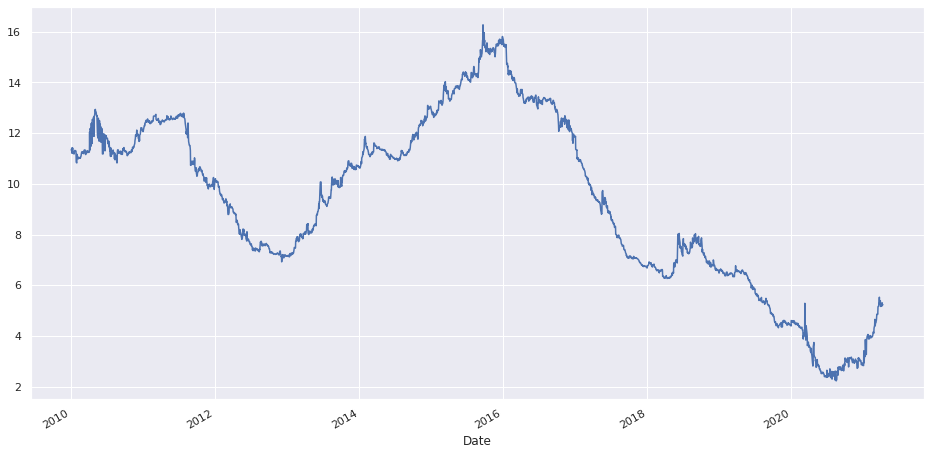

In [10]:
um_ano['Close'].plot();

In [11]:
data_inicio = '01/01/2010'
data_fim = '12/04/2021'
bonds = pd.DataFrame()

for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

In [12]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-06,3.382,4.075,4.700,5.175,7.375,7.830,8.310,8.870,9.405
2021-04-07,3.412,4.110,4.750,5.230,7.450,7.900,8.470,8.930,9.615
2021-04-08,3.456,4.170,4.815,5.310,7.545,7.995,8.210,9.040,9.170


In [13]:
bonds.index = pd.to_datetime(bonds.index)

In [14]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-06,3.382,4.075,4.700,5.175,7.375,7.830,8.310,8.870,9.405
2021-04-07,3.412,4.110,4.750,5.230,7.450,7.900,8.470,8.930,9.615
2021-04-08,3.456,4.170,4.815,5.310,7.545,7.995,8.210,9.040,9.170


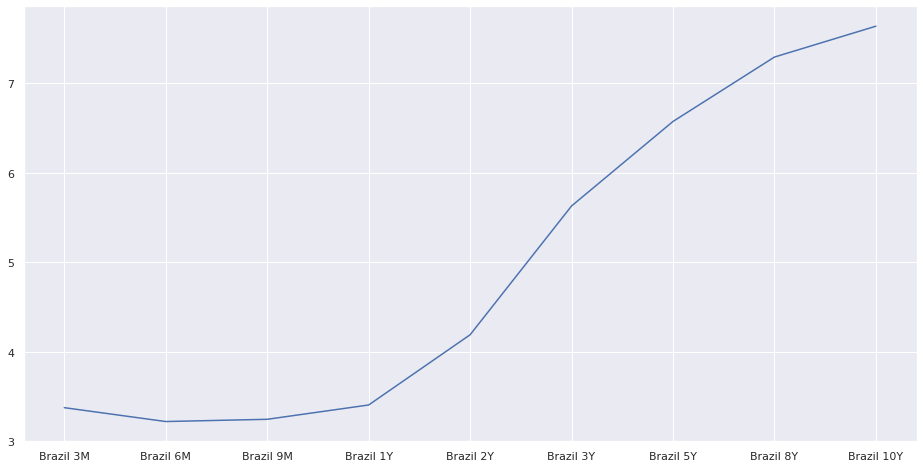

In [15]:
plt.plot(bondsBR , bonds.loc['2020-04-09'].values)

In [16]:
#Gerar curvas diarias
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode='lines', name=str(i)))
  
fig.show() #ver saída em tela cheia, click button right

In [18]:
#Gerar curvas mensalmente
data_inicio = '01/01/2010'
data_fim = '12/04/2021'
bondsMensal = pd.DataFrame()

for prazo in bondsBR:
  bondsMensal[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval='Monthly')['Close']

In [19]:
fig = go.Figure()

for i in bondsMensal.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR,
          y=bondsMensal.loc[i],
          mode='lines',
          name=str(i),
          visible=False
      )
  )

fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i] = True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês: "},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)

fig.show()

In [20]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [21]:
selic_meta = consulta_bc(432)

In [22]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [23]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))

fig.show()

## 3. Análise

Gráfico dos Fundos e SELIC (linha preto). A taxa SELIC definico pelo Banco Central (taxa básica de juros), o COPOM define a taxa a cada 45 dias. As demais taxas negocias pelo mercado, variação ao longo do tempo, exemplo: taxa para três meses (3M) fica mais próxima da taxa selic, enquanto a taxa de dez anos (10 Y) fica mais distante tendo em vista a expectativa do mercado (aumento da taxa de juros daqui 10 anos).

De março para abril de 2016 houve o impeachment da presidenta Dilma Rousseff, com isso o mercado começou a precificar uma melhorar da economia, as taxas futuras começaram a cair, em seguida a selic se estabilizou em um patamar acima de 6, depois voltou a cair.